# Entrenamiento Federado - Notebook de entrenamiento

### Importar librerias

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import h5py
from sklearn.metrics import classification_report
from TheModel import build
from tqdm import tqdm

### Importar datos locales

Para esto, se cargaran los datos locales dentro del archivo de `datos.csv` y la carpeta `data`

In [2]:
n = 4 #index de archivo a utilizar 
with h5py.File(f'data/datos_{n}.h5','r') as hf:
    X = hf['data_X'][:]
    y = hf['labels_y'][:]
    data = (X,y)

In [3]:
X.shape,y.shape

((12000, 28, 28, 1), (12000,))

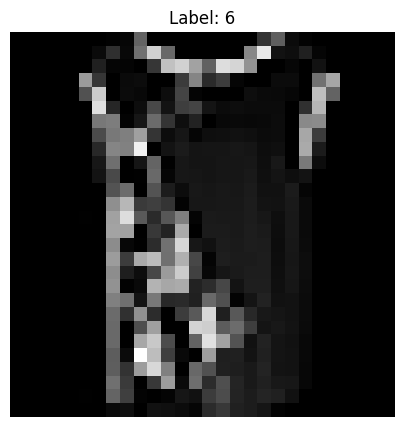

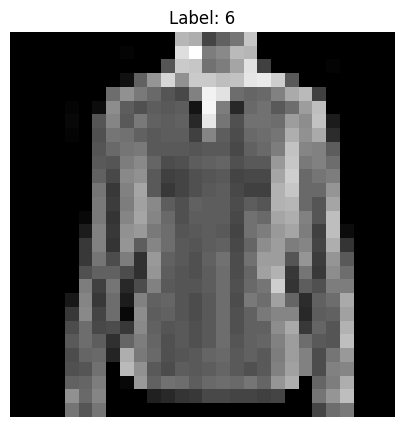

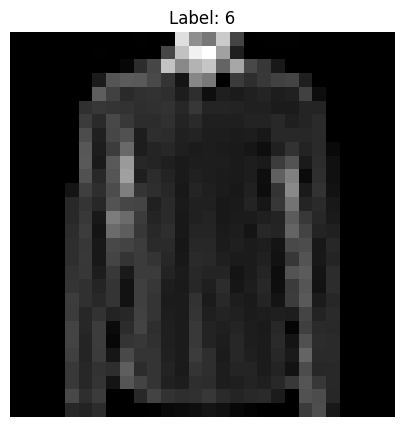

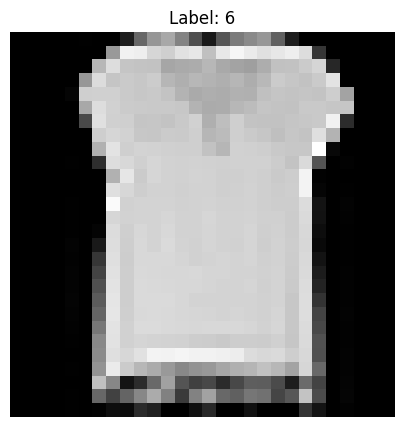

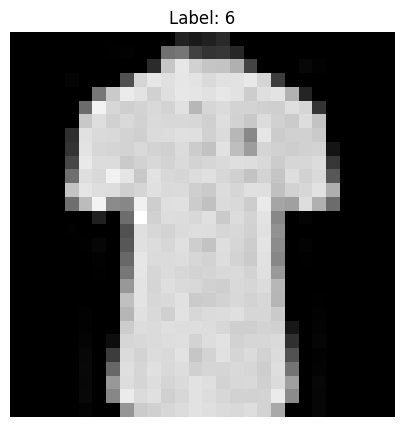

In [4]:
for i in range(5):
    image = X[i].squeeze() #Quitamos el canal de color
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

    plt.show()

In [5]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# ## Data split para simular cinco datos aparte.

# skf = StratifiedKFold(n_splits=5)

# folds = skf.split(x_train, y_train)

# local_data = [(x_train[tsix], y_train[tsix]) for trix, tsix in folds]

# for i,x in enumerate(local_data):
#     print(len(x[0]))
#     print(f"Frecuencia de números: { {int(y):list(x[1]).count(y) for y in set(x[1])} }")
#     print(f"Primeros ejemplos (labels): {[int(y) for y in list(x[1])[:15]]}")
#     #Utiliza el siguiente snippet para guardar los datos divididos
#     """    
#     with h5py.File(f'data/datos_{i}.h5','w') as hf:
#         hf.create_dataset('data_X', data=x[0])
#         hf.create_dataset('labels_y', data=x[1])
#     """

In [7]:

def train_and_verify(local_model, X_train, y_train,epochs, x_test, y_test, save_name):

    print(local_model)

    history = local_model.fit(X_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    local_model.save(save_name)

### Entrenamiento de datos n

c:\Users\Ruben\OneDrive\Documentos\ITESM_IDM\Semestre 8\BloqueIngenieria\semana 6\federado\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>
Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6213 - loss: 1.0902 - val_accuracy: 0.8154 - val_loss: 0.5032
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8223 - loss: 0.4917 - val_accuracy: 0.8471 - val_loss: 0.4153
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8502 - loss: 0.4125 - val_accuracy: 0.8671 - val_loss: 0.3736
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8672 - loss: 0.3729 - val_accuracy: 0.8629 - val_loss: 0.3868
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8726 - loss: 0.3470 - val_accuracy: 0.8550 - val_loss: 0.3826
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8895 - loss: 0.3051 - val_accuracy: 0.8658 - val_loss: 0.3554
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8894 - loss: 0.2895 - val_accuracy: 0.8750 - val_loss: 0.3459
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy

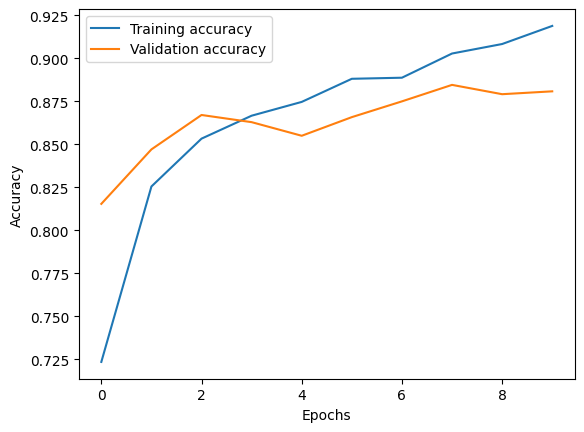

In [8]:
# Entrenamientos local
local_model = build.build_it()




train_and_verify(local_model, X_train,y_train, 10, X_test, y_test, f"models/lmodel_{n}.keras")